Melhores parâmetros encontrados:
{'alpha': 0.01, 'solver': 'sag'}

Avaliação do melhor modelo no conjunto de teste:
MSE: 2.61
MAE: 1.18
R²: 0.97


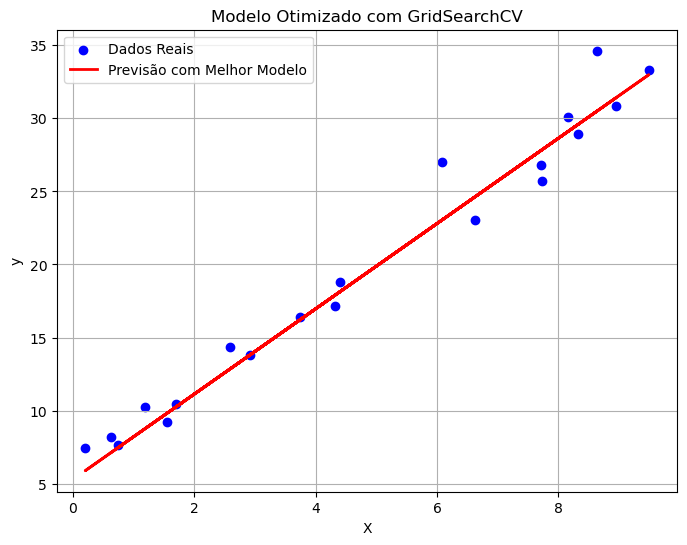

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Gerando dados sintéticos para regressão
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Valores entre 0 e 10
y = 3 * X.flatten() + 5 + np.random.randn(100) * 2  # Relação linear com ruído

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurando o modelo a ser otimizado
model = Ridge()  # Modelo de Regressão Linear com regularização L2

# Definindo o grid de hiperparâmetros para testar
param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 100],  # Diferentes valores de regularização
    "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]  # Algoritmos para resolver o problema
}

# Configurando o GridSearchCV
# Explicação:
# - GridSearchCV automatiza o processo de buscar pelos melhores hiperparâmetros.
# - `param_grid` define as combinações de valores que serão testadas.
# - `cv` especifica o número de divisões (folds) na validação cruzada. Aqui usamos 5.
# - `scoring` define a métrica para avaliar os modelos. Usamos R² (coeficiente de determinação).
# - `n_jobs=-1` permite que o processamento utilize todos os núcleos disponíveis para acelerar os cálculos.
grid_search = GridSearchCV(
    estimator=model,           # Modelo que queremos otimizar
    param_grid=param_grid,     # Hiperparâmetros a testar
    scoring="r2",              # Métrica usada para avaliar o modelo (quanto maior o R², melhor)
    cv=5,                      # Validação cruzada com 5 folds
    n_jobs=-1                  # Paralelismo para maior velocidade
)

# Executando o GridSearchCV
# - Este método executará a validação cruzada para cada combinação de hiperparâmetros
# - Ele calcula o desempenho médio em cada conjunto de validação e seleciona o melhor.
grid_search.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)  # Mostra a combinação ideal de hiperparâmetros

# Treinando o modelo com os melhores parâmetros
# - `best_estimator_` retorna o modelo ajustado com os melhores hiperparâmetros encontrados.
best_model = grid_search.best_estimator_

# Fazendo previsões e avaliando o modelo no conjunto de teste
# - Usamos o modelo otimizado para prever os valores de teste.
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # Calcula o erro médio quadrático
mae = mean_absolute_error(y_test, y_pred)  # Calcula o erro absoluto médio
r2 = r2_score(y_test, y_pred)  # Calcula o R², que mede a proporção da variância explicada

print("\nAvaliação do melhor modelo no conjunto de teste:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

# Visualizando os resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", label="Dados Reais")
plt.plot(X_test, y_pred, color="red", label="Previsão com Melhor Modelo", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Modelo Otimizado com GridSearchCV")
plt.legend()
plt.grid(True)
plt.show()
